KNN Accuracy is:  98.48484848484848 %
knn_train_accuracy =  98.76623376623377 %
knn_test_accuracy =  98.48484848484848 %
          N          P          K  temperature   humidity        ph  \
0  70.79126  23.700129  72.491631    41.670768  52.772845  6.047104   

     rainfall  
0  108.018539  

coffee
blackgram can't be planted is such conditions


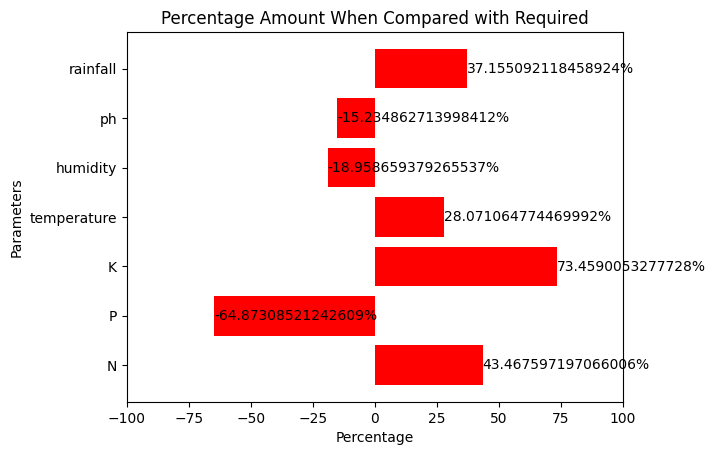

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

crops = pd.read_csv('Crop_recommendation.csv')

crops['label'].unique()

acc = []
model = []
features = crops[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crops['label']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.3,random_state =2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", (x*100), "%")

#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train)*100, "%")
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test)*100, "%")

import random

tempN = random.uniform(10,100)
tempP = random.uniform(10,100)
tempK = random.uniform(10,100)
tempt = random.uniform(10,50)
temph = random.uniform(40,80)
tempp = random.uniform(5,8)
tempr = random.uniform(20,300)

x_values = np.array([[tempN, tempP, tempK, tempt, temph, tempp, tempr]])
x_data = pd.DataFrame(x_values, columns = ['N','P','K','temperature','humidity','ph','rainfall'])
ans = knn.predict(x_data)
print(x_data,end="\n\n")
print(ans[0])

import re
import string
def convert_to_lower(text):
    return text.lower()
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

crop_x = input("Crop to be yielded : ")
crop_x = convert_to_lower(remove_numbers(remove_punctuation(remove_extra_white_spaces(crop_x))))

import numpy as np

def deviatedornot(data, val):

    variance = np.var(data)
    squared_difference1 = (val - np.mean(data)) ** 2
    squared_difference2 = (np.mean(data) - val) ** 2

    if (squared_difference1 > variance) & (squared_difference2 > variance):
        return False
    else:
        return True

x_rows = crops[crops['label']==crop_x]
x_rows = x_rows.drop(['label'], axis=1)

x_N = x_rows['N'].mean()
x_P = x_rows['P'].mean()
x_K = x_rows['K'].mean()
x_t = x_rows['temperature'].mean()
x_h = x_rows['humidity'].mean()
x_p = x_rows['ph'].mean()
x_r = x_rows['rainfall'].mean()

mean_val = [x_rows[col].mean() for col in x_rows.columns]

percent = []
for x, y in zip(mean_val, x_data):
    if x>x_data[y][0]:
        percent.append(-((x-x_data[y][0])*100/x))
    elif x<=x_data[y][0]:
        percent.append(((x_data[y][0]-x)*100/x_data[y][0]))

import matplotlib.pyplot as plt

if ans[0]==crop_x:
    print(f"The current state of soil is {crop_x} ready")
else:
    print(f"{crop_x} can't be planted is such conditions")

    param = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

    plt.barh(param, percent, color='red')

    for i, p in enumerate(percent):
        plt.text(p, i, f"{p}%", ha='left', va='center', color='black')

    plt.xlim(-100, 100)
    plt.xlabel('Percentage')
    plt.ylabel('Parameters')
    plt.title('Percentage Amount When Compared with Required')
    plt.show()